In [28]:
from datetime import datetime, timedelta, UTC
from pathlib import Path

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

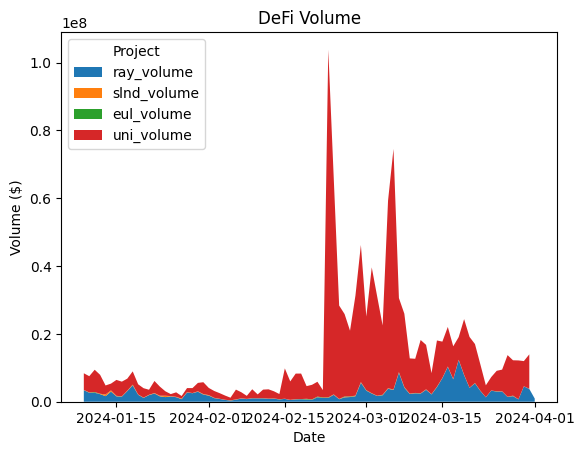

In [38]:
selection = pl.read_parquet(
    Path().resolve().parent.joinpath("data", "eth_v_sol.parquet")
)

selection = (
    selection.select(("day", "ray_avg_trade_size", "slnd_volume", "eul_volume", "uni_volume"))
    .drop_nulls("day")
    .filter(
        pl.col("day").is_between(
            (datetime.now(UTC) - timedelta(weeks=12)), datetime.now(UTC)
        )
    )
)

categories = selection.columns[1:]

plt.stackplot(
    selection["day"],
    [selection.to_pandas().set_index("day")[cat] for cat in categories],
    labels=categories,
)


plt.title("DeFi Volume")
plt.xlabel("Date")
plt.ylabel("Volume ($)")
plt.legend(title="Project", loc="upper left")

plt.show()

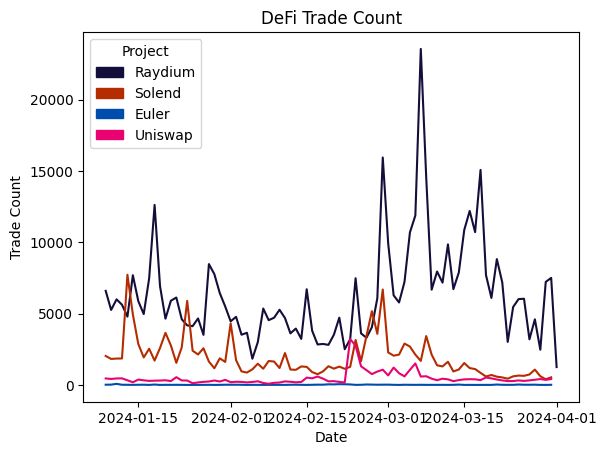

In [49]:
selection = pl.read_parquet(
    Path().resolve().parent.joinpath("data", "eth_v_sol.parquet")
)

selection = (
    selection.select(
        (
            "day",
            "ray_trade_count",
            "slnd_trade_count",
            "eul_trade_count",
            "uni_trade_count",
        )
    )
    .drop_nulls("day")
    .filter(
        pl.col("day").is_between(
            (datetime.now(UTC) - timedelta(weeks=12)), datetime.now(UTC)
        )
    )
)

categories = selection.columns[1:]

sns.lineplot(selection, x="day", y="ray_trade_count", color="#140e3a")
sns.lineplot(selection, x="day", y="slnd_trade_count", color="#b42c00")
sns.lineplot(selection, x="day", y="eul_trade_count", color="#004CAD")
sns.lineplot(selection, x="day", y="uni_trade_count", color="#e80371")

top = mpatches.Patch(color="#140e3a", label="Raydium")
top_mid = mpatches.Patch(color="#b42c00", label="Solend")
bottom_mid = mpatches.Patch(color="#004CAD", label="Euler")
bottom = mpatches.Patch(color="#e80371", label="Uniswap")


plt.legend(title="Project", loc="upper left", handles=[top, top_mid, bottom_mid, bottom])


plt.title("DeFi Trade Count")
plt.xlabel("Date")
plt.ylabel("Trade Count")
# plt.legend(title="Project", loc="upper left")

plt.show()

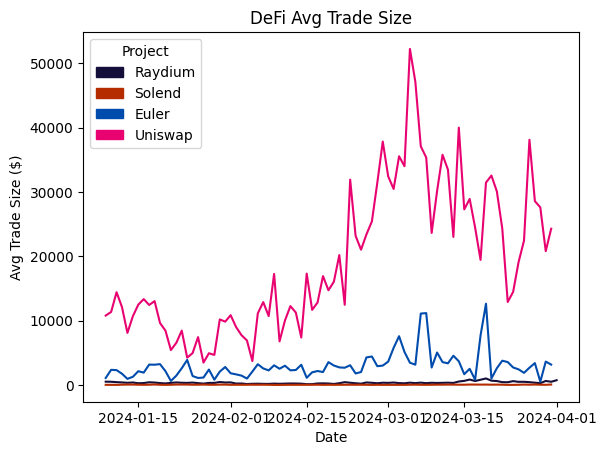

In [46]:
selection = pl.read_parquet(
    Path().resolve().parent.joinpath("data", "eth_v_sol.parquet")
)

selection = (
    selection.select(
        (
            "day",
            "ray_avg_trade_size",
            "slnd_avg_trade_size",
            "eul_avg_trade_size",
            "uni_avg_trade_size",
        )
    )
    .drop_nulls("day")
    .filter(
        pl.col("day").is_between(
            (datetime.now(UTC) - timedelta(weeks=12)), datetime.now(UTC)
        )
    )
)

categories = selection.columns[1:]

sns.lineplot(selection, x="day", y="ray_avg_trade_size", color="#140e3a")
sns.lineplot(selection, x="day", y="slnd_avg_trade_size", color="#b42c00")
sns.lineplot(selection, x="day", y="eul_avg_trade_size", color="#004CAD")
sns.lineplot(selection, x="day", y="uni_avg_trade_size", color="#e80371")

top = mpatches.Patch(color="#140e3a", label="Raydium")
top_mid = mpatches.Patch(color="#b42c00", label="Solend")
bottom_mid = mpatches.Patch(color="#004CAD", label="Euler")
bottom = mpatches.Patch(color="#e80371", label="Uniswap")


plt.legend(title="Project", loc="upper left", handles=[top, top_mid, bottom_mid, bottom])


plt.title("DeFi Avg Trade Size")
plt.xlabel("Date")
plt.ylabel("Avg Trade Size ($)")
# plt.legend(title="Project", loc="upper left")

plt.show()